In [2]:
import pandas as pd

In [3]:
with open('res.csv') as f0:
    with open('responses.csv', 'w') as f1:
        f1.write('id,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment\n')
        for line in f0.readlines():
            if (line.count('Selector')) and (line.count(',') == 15):
                f1.write(line)

In [4]:
with open('res.csv') as f0:
    with open('age.csv', 'w') as f1:
        f1.write('id,age\n')
        for line in f0.readlines():
            if line.count('age,'):
                cropped = line[line.find('Final') + 6:]
                cropped = cropped[:cropped.find(',')]
                f1.write(line[:line.find(',')] + ',' + cropped + '\n')

In [5]:
with open('res.csv') as f0:
    with open('linguist.csv', 'w') as f1:
        f1.write('id,linguist\n')
        for line in f0.readlines():
            if line.count('linguist,'):
                cropped = line[line.find('Choice') + 7:]
                cropped = cropped[:cropped.find(',')]
                f1.write(line[:line.find(',')] + ',' + cropped + '\n')

In [6]:
res = pd.read_csv('responses.csv')
age = pd.read_csv('age.csv')
linguist = pd.read_csv('linguist.csv')

In [7]:
res = res.set_index('id').join(age.set_index('id'))

In [8]:
res.head()

,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment,age
id,,,,,,,,,,,,,,,,
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,11,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703510925433,undefined,moscow,0,sent_vs;sent_sv,1
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,12,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703510926062,undefined,tigers,0,sent_vs;sent_sv,1
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,18,0,experiment,NaN,Selector,answer,Selection,sent_sv,1703510926585,undefined,wheels,0,sent_sv;sent_vs,1
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,3,0,experiment,NaN,Selector,answer,Selection,sent_sv,1703510927086,undefined,carriages,1,sent_sv;sent_vs,1
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,7,0,experiment,NaN,Selector,answer,Selection,sent_sv,1703510927573,undefined,horns,0,sent_sv;sent_vs,1


In [9]:
res = res[res.age >= 18]

In [10]:
res.shape

(720, 16)

In [11]:
target_parameters = ['bows','carriages','computers','buttons','lightbulbs','horns','baskets','castles','drawers']

In [12]:
target = res[res.situation.isin(target_parameters)]

In [13]:
target = target.replace({'sent_vs': 0, 'sent_sv': 1})

In [14]:
target.shape

(360, 16)

In [15]:
target.head()

,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment,age
id,,,,,,,,,,,,,,,,
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,7,0,experiment,NaN,Selector,answer,Selection,0,1703514657376,undefined,horns,2,sent_sv;sent_vs,19
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,8,0,experiment,NaN,Selector,answer,Selection,0,1703514679298,undefined,baskets,1,sent_vs;sent_sv,19
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,3,0,experiment,NaN,Selector,answer,Selection,0,1703514722416,undefined,carriages,0,sent_sv;sent_vs,19
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,6,0,experiment,NaN,Selector,answer,Selection,0,1703514756103,undefined,lightbulbs,0,sent_vs;sent_sv,19
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,2,0,experiment,NaN,Selector,answer,Selection,0,1703514766880,undefined,bows,1,sent_sv;sent_vs,19


In [16]:
import matplotlib.pyplot as plt

In [17]:
target.groupby(['situation', 'count'])['value'].count()

situation   count
baskets     0        14
            1        16
            2        10
bows        0        14
            1        16
            2        10
buttons     0        14
            1        16
            2        10
carriages   0        16
            1        10
            2        14
castles     0        16
            1        10
            2        14
computers   0        10
            1        14
            2        16
drawers     0        10
            1        14
            2        16
horns       0        10
            1        14
            2        16
lightbulbs  0        16
            1        10
            2        14
Name: value, dtype: int64

In [18]:
stat = target.groupby(['situation', 'count'])['value'].mean()

In [19]:
legend = ['≤1', '1', '≥1']

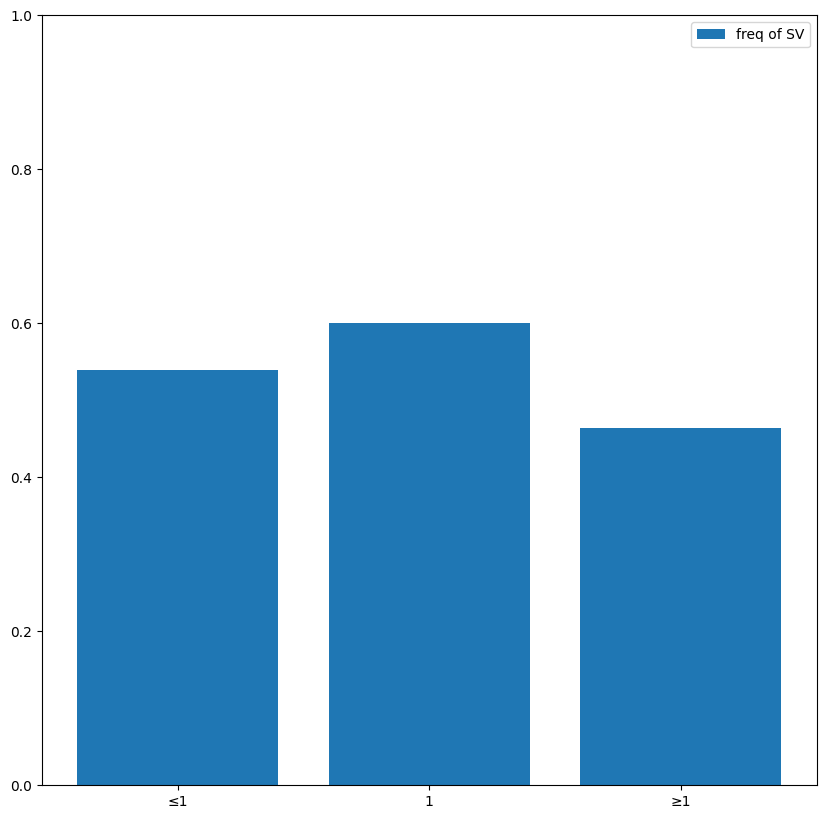

In [57]:
plt.figure(figsize=(10,10))
plt.bar(legend, stat.groupby('count').mean())
plt.ylim((0, 1))
plt.legend([r'freq of SV'])
plt.show()

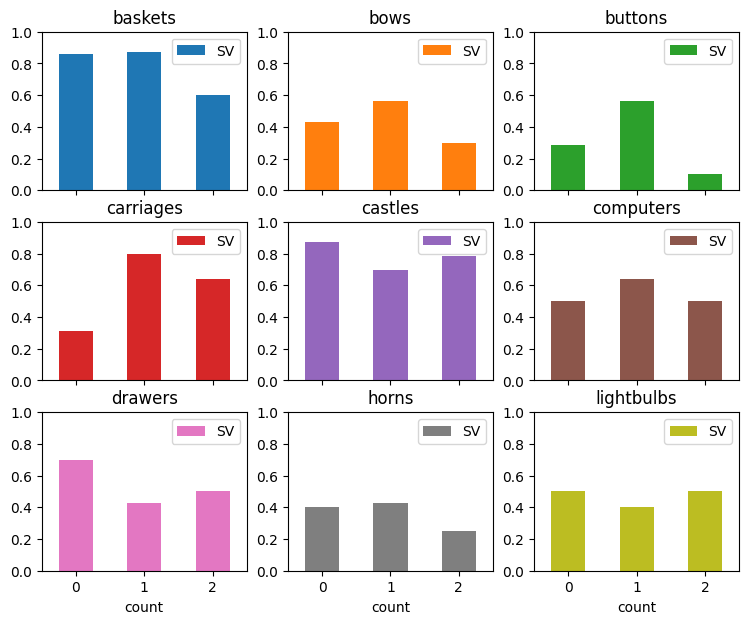

In [39]:
ax = stat.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(3,3))
for axes in ax:
    for axis in axes:
        axis.set_ylim((0, 1))
        axis.legend(['SV'])
    

In [22]:
from scipy import stats

In [23]:
df_zero = target[target['count'] == 0]
df_one = target[target['count'] == 1]
df_two = target[target['count'] == 2]

### t test

In [24]:
stats.ttest_ind(df_zero['value'], df_one['value'], alternative='less')

Ttest_indResult(statistic=-0.9106740717564223, pvalue=0.18169426102110714)

In [40]:
stats.ttest_ind(df_two['value'], df_one['value'], alternative='less')

Ttest_indResult(statistic=-1.949227832839643, pvalue=0.026221503200795356)

### linreg

In [42]:
stats.linregress(df_zero['value'], df_one['value'], alternative='less')

LinregressResult(slope=0.2013986013986018, intercept=0.4909090909090907, rvalue=0.20483662259967603, pvalue=0.9875914768973308, stderr=0.08859314212220112, intercept_stderr=0.06520278713498974)

In [43]:
stats.linregress(df_two['value'], df_one['value'], alternative='less')

LinregressResult(slope=0.16040100250626532, intercept=0.523809523809524, rvalue=0.1635038238626574, pvalue=0.9628186855817653, stderr=0.08909514688568147, intercept_stderr=0.061404592412343674)

### mixed effects linreg

In [ ]:
%pip install statsmodels

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [73]:
model = smf.mixedlm("value ~ C(count, Treatment(1)) + C(situation)", target.reset_index(), groups='id').fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                 MixedLM      Dependent Variable:      value    
No. Observations:      360          Method:                  REML     
No. Groups:            40           Scale:                   0.1840   
Min. group size:       9            Log-Likelihood:          -242.9984
Max. group size:       9            Converged:               Yes      
Mean group size:       9.0                                            
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    0.860    0.081 10.626 0.000  0.701  1.018
C(count, Treatment(1))[T.0] -0.077    0.056 -1.374 0.169 -0.186  0.033
C(count, Treatment(1))[T.2] -0.132    0.056 -2.361 0.018 -0.241 -0.022
C(situation)[T.bows]        -0.350    0.096 -3.649 0.000 -0.538 -0.162
C(situation)[T.buttons]     -0.450    0.096 -4.691 0.000 -0.638 -0.262
C(situation)[T.carriages]   -0.233    0.096 -2.422 0.015 -0.422 -0.044
C(situation)[T.castles]      0.017    0.096  0.177 0.860 -0.172  0.206
C(situation)[T.computers]   -0.238    0.096 -2.473 0.013 -0.426 -0.049
C(situation)[T.drawers]     -0.263    0.096 -2.733 0.006 -0.451 -0.074
C(situation)[T.horns]       -0.438    0.096 -4.552 0.000 -0.626 -0.249
C(situation)[T.lightbulbs]  -0.308    0.096 -3.201 0.001 -0.497 -0.119
id Var                       0.044    0.036                           
======================================================================

"""